In [1]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
import imutils

from sklearn.metrics import confusion_matrix
%matplotlib inline

# True mask

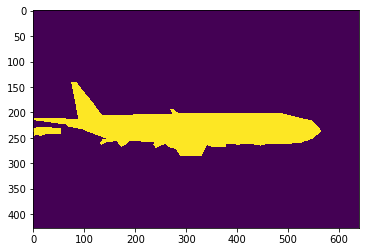

In [2]:
# loading true mask
mask_true = joblib.load("./picklefiles/1CH_val_masks/5/5.13348.dat")
plt.imshow(mask_true)

# Predicted mask

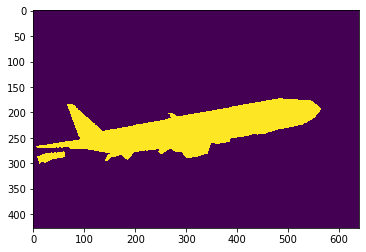

In [3]:
# rotating mask to simulate predicted mask
mask_pred = imutils.rotate(mask_true,angle=10)
plt.imshow(mask_pred)

# Intersection of masks

$$mask_{intersection} = mask_{true} \bigcap mask_{pred}$$


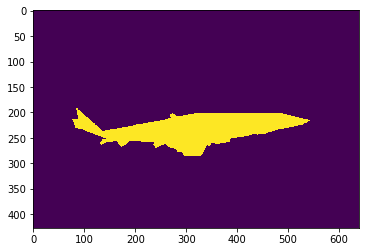

In [4]:
intersection = np.bitwise_and(mask_true,mask_pred)
plt.imshow(intersection)

# Union of masks

$$mask_{union} = mask_{true} \bigcup mask_{pred}$$

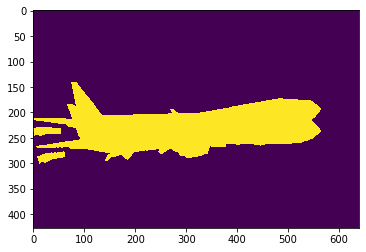

In [5]:
union = np.bitwise_or(mask_true,mask_pred)
plt.imshow(union)

# Understandig Elements of Confusion Matrix
![Confusion Matrix](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)



Elements of Confusion matrix for image segmentation:
1. **`TP`** : Pixels that have been correctly classified as 1s in mask_pred
2. **`TN`** : Pixels that have been correctly classified as 0s in mask_pred
3. **`FP`** : Pixels that have been falsely classified as 1s in mask_pred
4. **`FN`** : Pixels that have been falsely classified as 0s in mask_pred

Area in WHITE shows required region of each subplot


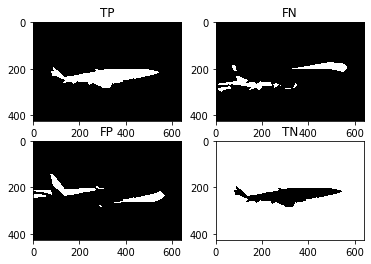

In [6]:

def get_elements_confusion_matrix(self,mask_true,mask_pred):
    
    TP = np.bitwise_and(mask_true, mask_pred)
    TP[TP==255] = 0

    FN = np.bitwise_not(mask_true) - np.bitwise_not(mask_pred)
    FN[FN==255] = 0

    TN = np.bitwise_not(np.bitwise_and(mask_true, mask_pred))
    TN[TN==255] = 0
    TN = np.bitwise_not(TN)

    FP = mask_true - mask_pred 
    FP[FP==255] = 0
    
    return (TP,FN,TN,FP)

def plot_confusion_matrix(self,mask_true,mask_pred):
    
    TP,FN,TN,FP = get_elements_confusion_matrix(0,mask_true,mask_pred)
    
    plt.subplot(2,2,1)
    plt.title("TP")
    plt.imshow(TP,cmap="gray")
    
    plt.subplot(2,2,2)
    plt.title("FN")
    plt.imshow(FN,cmap="gray")
    
    plt.subplot(2,2,3)
    plt.title("FP")
    plt.imshow(FP,cmap="gray")
    
    plt.subplot(2,2,4)
    plt.title("TN")
    plt.imshow(TN,cmap="gray")
    
    
    plt.plot()
    plt.show()
    
    
TP,FN,TN,FP = get_elements_confusion_matrix(0,mask_true,mask_pred)

print("Area in WHITE shows required region of each subplot")
plot_confusion_matrix(0,mask_true,mask_pred)

# Jaccard index

$$Jaccard(X,Y) = \frac{TP}{TP+FP+FN}= \frac{\mid X \bigcap  Y\mid}{\mid X \mid + \mid Y \mid - \mid X \bigcap Y \mid} = \frac{\mid X \bigcap  Y\mid}{ \mid X \bigcup Y \mid} $$



In [7]:
Ji = np.sum(TP)/(np.sum(TP)+np.sum(FP)+np.sum(FN))
# this verifies our values of TP,TN, FP,FN are correct
Ji, np.sum(intersection)/np.sum(union)

(0.4601147641221015, 0.4601147641221015)

# Dice coefficient

$$ Dice(X,Y) = \frac{2TP}{2TP+FP+FN} = \frac{2 \mid X \bigcap  Y\mid}{\mid X \mid + \mid Y\mid }$$

In [8]:
D = 2*np.sum(TP)/(2*np.sum(TP)+np.sum(FP)+np.sum(FN))
D

0.6302446566914169

# Testing Class implementation

In [9]:
from nntool.metrics import Metrics
from visualize.plots import Plots
from loadData import LoadData

plt_ob = Plots()
met_ob = Metrics()
ld_ob = LoadData()

In [10]:
met_ob.jaccard_index(mask_true,mask_pred)

0.4601147641221015

In [11]:
met_ob.dice_coefficient(mask_true,mask_pred)

0.6302446566914169

In [12]:
img = ld_ob.getImg(13348,joblib.load("./picklefiles/img_path_df"))

In [13]:
%matplotlib qt
plt_ob.plot_confusion_matrix(mask_true,mask_pred,img)